In [39]:
from datasets import load_from_disk

dataset = load_from_disk("/home/allanz/data/datasets/spuco/test/multimodal_dataset")

{'text': "| cat | ship | automobile |\n| cat | automobile | cat |\n| bird | ship | automobile |\nThe grid above is size 3 by 3. Each cell contains an object from ['cat', 'bird', 'automobile', 'ship'].\nWhat object is in row 2, column 2? A: automobile\nWhat object is in row 2, column 1? A: ship\nWhat object is in row 0, column 1? A: ship\nWhat object is in row 1, column 0? A: cat\nWhat object is in row 0, column 2? A: automobile\nWhat object is in row 2, column 0? A: bird\nWhat object is in row 0, column 0? A: cat\nWhat object is in row 1, column 2? A: cat\nWhat object is in row 1, column 1? A: automobile", 'prompt': "The grid above is size 3 by 3. Each cell contains an object from ['cat', 'bird', 'automobile', 'ship'].", 'conversations': [['What object is in row 2, column 2? ', 'automobile'], ['What object is in row 2, column 1? ', 'ship'], ['What object is in row 0, column 1? ', 'ship'], ['What object is in row 1, column 0? ', 'cat'], ['What object is in row 0, column 2? ', 'automobil

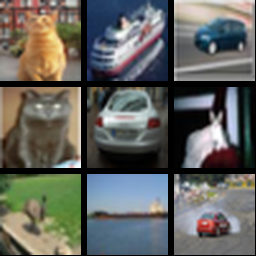

In [51]:
import random
from PIL import Image
i = random.randint(0, len(dataset["train"]))
print(dataset["train"][i])
Image.open(dataset["train"][i]["image"])


In [4]:
dataset["train"][0]

{'text': "| automobile | deer | deer |\n| bird | bird | bird |\n| cat | automobile | bird |\nThe grid above is size 3 by 3. Each cell contains an object from ['bird', 'deer', 'automobile', 'cat'].\nWhat object is in row 2, column 2? A: bird\nWhat object is in row 0, column 0? A: automobile\nWhat object is in row 1, column 0? A: bird\nWhat object is in row 1, column 2? A: bird\nWhat object is in row 2, column 0? A: cat\nWhat object is in row 0, column 1? A: deer\nWhat object is in row 1, column 1? A: bird\nWhat object is in row 0, column 2? A: deer\nWhat object is in row 2, column 1? A: automobile",
 'grid': [['automobile', 'deer', 'deer'],
  ['bird', 'bird', 'bird'],
  ['cat', 'automobile', 'bird']]}